# Heart Disease Prediction Using Logistic Regression

### Industry: Healthcare
World Health Organization reported that there are 12 million deaths worldwide each year due to heart disease. Half the deaths are caused by cardiovascular
diseases in the United States and other developing countries. The early prognosis of cardiovascular disorders will help make decisions about improvements in
lifestyle in high-risk patients and, in effect, reduce the complications. This research aims to classify the most relevant / risk factors for cardiac disease and estimate
the overall risk using logistic regression.
### Dataset Description:
The dataset is publicly available on the Kaggle website (https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression?resource=download) it is from an ongoing
cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future
coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4238 records and 16 attributes.
### Variables/Attributes :
Each attribute is a potential risk factor. There are demographic, behavioral, and medical risk factors.
#### Demographic: sex: male or female;(Nominal)
age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
#### Behavioral
current smoker: whether or not the patient is a current smoker (Nominal)
cigsPerDay: the number of cigarettes that the person smoked on average in one day. (can be considered continuous as one can have any number of
cigarettes, even half a cigarette.)
#### Medical( history):

    BPMeds: whether or not the patient was on blood pressure medication (Nominal)
    prevalent stroke: whether or not the patient had previously had a stroke (Nominal)
    prevalentHyp: whether or not the patient was hypertensive (Nominal)
    diabetes: whether or not the patient had diabetes (Nominal)


### Medical(current):

    totChol: total cholesterol level (Continuous)
    sysBP: systolic blood pressure (Continuous)
    diaBP: diastolic blood pressure (Continuous)
    BMI: Body Mass Index (Continuous)
    heartRate: heart rate (Continuous - In medical research, variables such as heart rate though, discrete, yet are considered continuous because of the
    large number of possible values.)
    glucose: glucose level (Continuous)
    Ten-year risk of coronary heart disease CHD (binary: “1”, means “Yes,” “0” means “No”) TARGET

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
heart_df=pd.read_csv("framingham.csv")
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
heart_df.shape

(4238, 16)

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Missing values

In [5]:
heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
heart_df.drop(['education'],axis=1,inplace=True)

In [7]:
heart_df.rename(columns={'male':'Sex_male'},inplace=True)

In [8]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missingvalues are excluded.')

Total number of rows with missing values is  489
since it is only 12 percent of the entire dataset the rows with missingvalues are excluded.


In [9]:
heart_df.dropna(axis=0,inplace=True)

In [10]:
heart_df.isnull().sum()

Sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### EDA

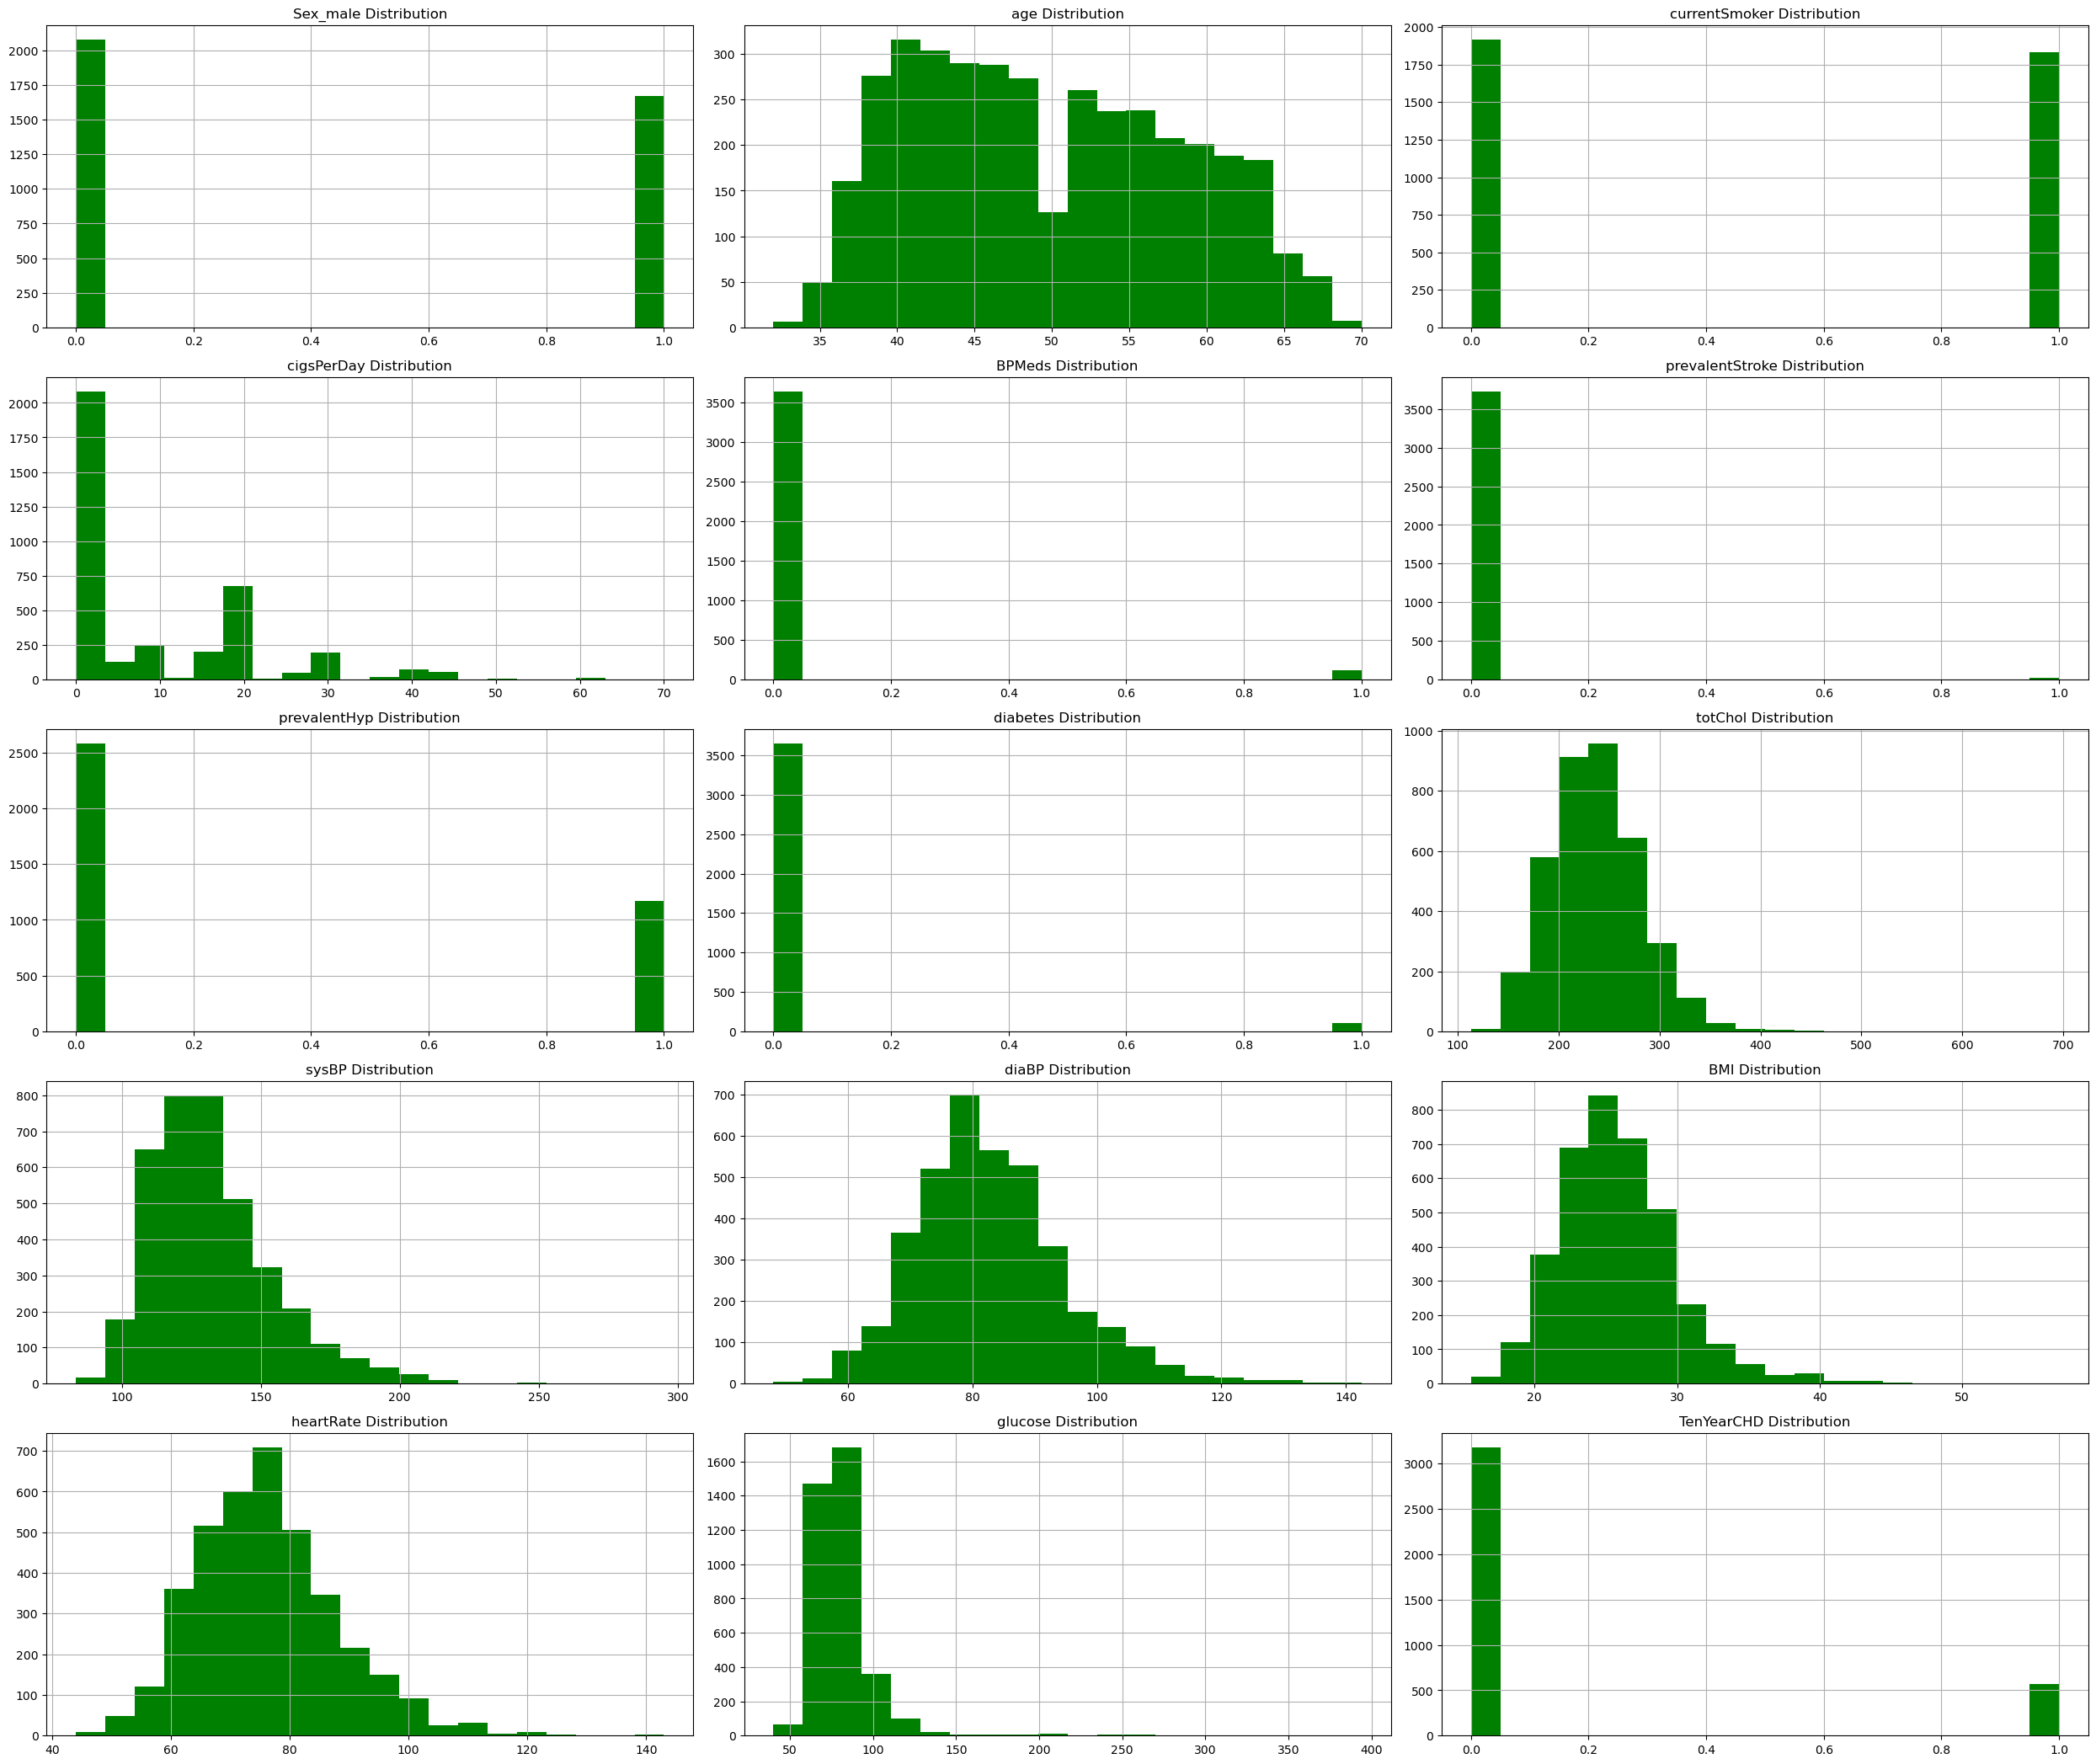

In [11]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(25,25))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='Green')
        ax.set_title(feature+" Distribution",color='Black')
    
    fig.tight_layout()
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

In [12]:
heart_df.TenYearCHD.value_counts()

TenYearCHD
0    3177
1     572
Name: count, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

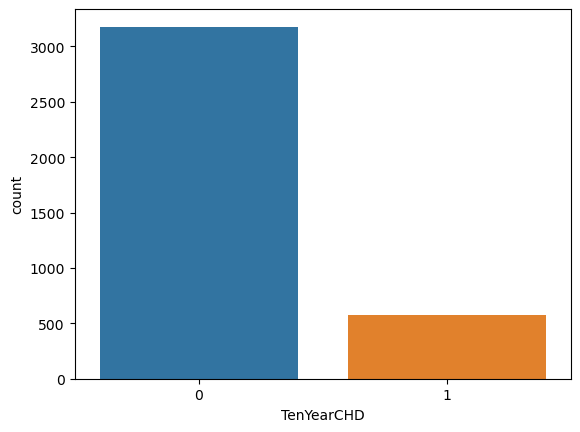

In [13]:
sn.countplot(x='TenYearCHD',data=heart_df)

/home/banty/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


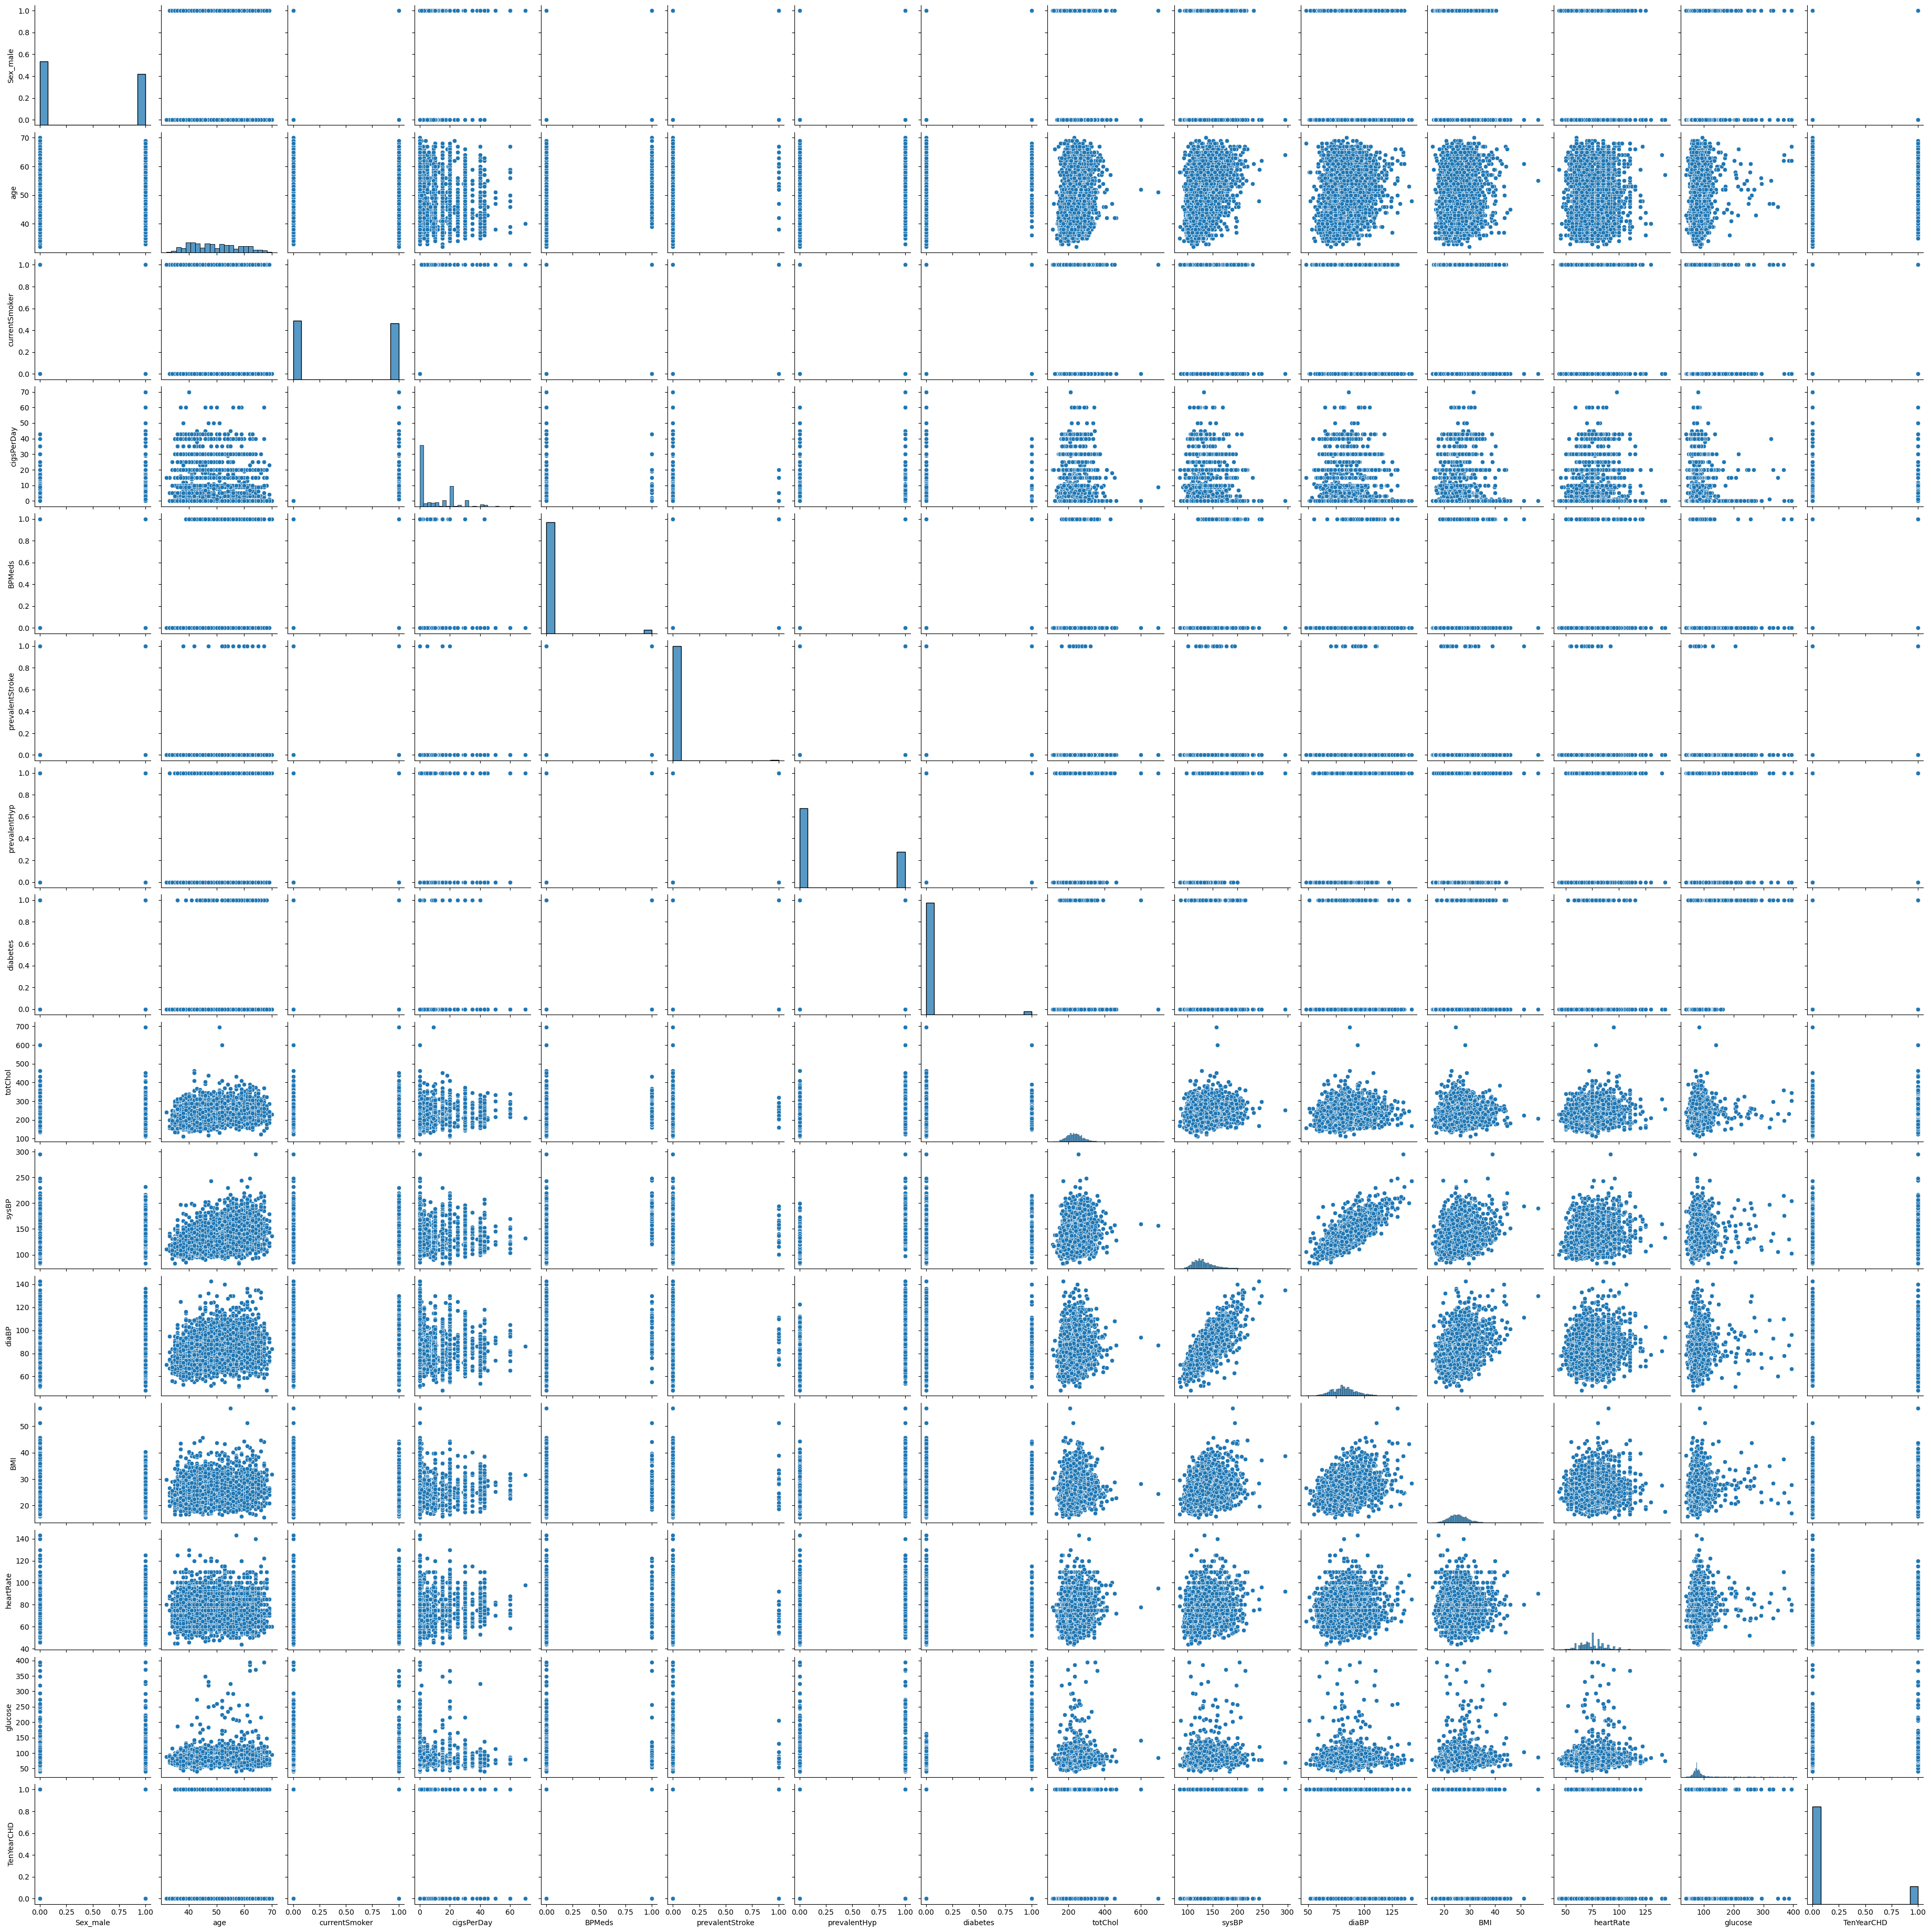

In [14]:
sn.pairplot(data=heart_df)

In [15]:
heart_df.describe()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Building a Logistic Regression model
Logistic regression is a form of regression analysis used in statistics to predict the outcome of a categorical variable based on a set of predictors or independent
variables. The dependent variable in logistic regression is always binary. Logistic regression is used mainly for estimation and also for estimating the probability of
success.

In [16]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()

,const,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [17]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377199
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3734
Method:                           MLE   Df Model:                           14
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.1169
Time:                        00:19:23   Log-Likelihood:                -1414.1
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.922e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6463      0.687    -12.577      0.000      -9.994      -7.299
Sex_male            0.5740      0.107      5.343      0.000       0.363       0.785
age                 0.0640      0.007      9.787      0.000       0.051       0.077
currentSmoker       0.0732      0.155      0.473      0.636      -0.230       0.376
cigsPerDay          0.0184      0.006      3.003      0.003       0.006       0.030
BPMeds              0.1446      0.232      0.622      0.534      -0.311       0.600
prevalentStroke     0.7191      0.489      1.471      0.141      -0.239       1.677
prevalentHyp        0.2146      0.136      1.574      0.116      -0.053       0.482
diabetes            0.0025      0.312      0.008      0.994      -0.609       0.614
totChol             0.0022      0.001      2.074      0.038       0.000       0.004
sysBP               0.0153      0.004      4.080      0.000       0.008       0.023
diaBP              -0.0039      0.006     -0.619      0.536      -0.016       0.009
BMI                 0.0103      0.013      0.820      0.412      -0.014       0.035
heartRate          -0.0023      0.004     -0.550      0.583      -0.010       0.006
glucose             0.0076      0.002      3.408      0.001       0.003       0.012
===================================================================================
"""

The results above show some of the attributes with P-value higher than the preferred alpha(5%) and thereby showing a low statistically significant relationship with
the probability of heart disease. The backward elimination approach is used here to remove those attributes with the highest P-value one at a time, followed by
repeatedly running the regression until all attributes have P Values less than 0.05.

### Feature Selection: Backward elemination (P-value approach)

In [18]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly elem
inating feature with the highest
P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""
     
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)
            
result=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)

In [19]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3742
Method:                           MLE   Df Model:                            6
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.1148
Time:                        00:19:32   Log-Likelihood:                -1417.6
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.548e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1211      0.468    -19.491      0.000     -10.038      -8.204
Sex_male       0.5813      0.105      5.521      0.000       0.375       0.788
age            0.0654      0.006     10.330      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.803      0.000       0.012       0.028
totChol        0.0023      0.001      2.099      0.036       0.000       0.004
sysBP          0.0174      0.002      8.166      0.000       0.013       0.022
glucose        0.0076      0.002      4.573      0.000       0.004       0.011
==============================================================================
"""

### Odds Ratio, Confidence Intervals and Pvalues

In [20]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000044       0.000274    0.000109   0.000
Sex_male        1.454877       2.198166    1.788313   0.000
age             1.054409       1.080897    1.067571   0.000
cigsPerDay      1.011730       1.028128    1.019896   0.000
totChol         1.000150       1.004386    1.002266   0.036
sysBP           1.013299       1.021791    1.017536   0.000
glucose         1.004343       1.010895    1.007614   0.000


This fitted model shows that holding all other features constant, the odds of getting diagnosed with heart disease for males (sex_male = 1) over that of
females (sex_male = 0) is exp(0.5815) = 1.788687. In terms of percent change, we can say that males' odds are 78.8% higher than the odds for females.

The coefficient for age says that holding all others constant, and we will see a 7% increase in the odds of getting diagnosed with CDH for a one year increase
in age since exp(0.0655) = 1.067644.

Similarly, with every extra cigarette one smokes, there is a 2% increase in the odds of CDH.

For the total cholesterol level and glucose level, there is no significant change.

There is a 1.7% increase in odds for every unit increase in systolic Blood Pressure.

### Training the model

In [21]:
import sklearn
new_features=heart_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

### Fit the data and Train the model

In [22]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

### Model Evaluation

In [23]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8706666666666667

### Confusion Matrix

<Axes: >

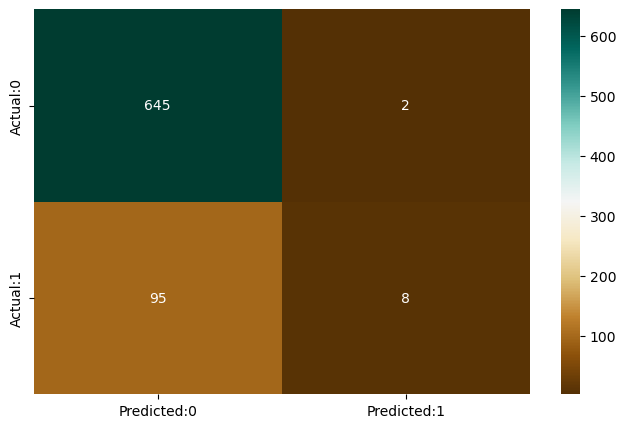

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="BrBG")

The confusion matrix shows 652+5 = 657 correct predictions and 87+7= 94 incorrect ones.

True Positives: 5

True Negatives: 652

False Positives: 7 (Type I error)

False Negatives: 87 ( Type II error)

In [25]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print("True Negative", TN)
print("True Positive", TP)
print("False Negative", FN)
print("False Positive", FP)
print("Sensitivity", sensitivity)
print("Specificity", specificity)

True Negative 645
True Positive 8
False Negative 95
False Positive 2
Sensitivity 0.07766990291262135
Specificity 0.9969088098918083


In [26]:
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',
'Misclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',
'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n\n',
'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n\n',
'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n\n',
'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n\n',
'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n\n',
'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The accuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8706666666666667 

 Misclassification = 1-Accuracy =  0.1293333333333333 

 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.07766990291262135 

 Specificity or True Negative Rate = TN/(TN+FP) =  0.9969088098918083 

 Positive Predictive value = TP/(TP+FP) =  0.8 

 Negative predictive Value = TN/(TN+FN) =  0.8716216216216216 

 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  25.126213592232638 

 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.925190035372921


### Predicted probabilities of 0 (Coronary Heart Disease: No) and 1 ( Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5

In [27]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.775992,0.224008
1,0.545858,0.454142
2,0.831874,0.168126
3,0.887945,0.112055
4,0.920600,0.079400


### Lower the threshold
Since the model is predicting Heart disease, too many type II errors are not advisable. A False Negative ( ignoring the probability of disease when there is one) is
more dangerous than a False Positive in this case. Hence to increase the sensitivity, the threshold can be lowered

In [28]:
from sklearn.preprocessing import Binarizer

for i in range(1, 5):
    cm2 = 0
    y_pred_prob_yes = logreg.predict_proba(x_test)

    # Create a Binarizer object with the desired threshold
    binarizer = Binarizer(threshold=i/10)

    # Apply the binarizer to the probabilities
    y_pred2 = binarizer.transform(y_pred_prob_yes)[:, 1]

    cm2 = confusion_matrix(y_test, y_pred2)
    print('With', i/10, 'threshold the Confusion Matrix is ','\n', cm2, '\n',
          'with', cm2[0,0]+cm2[1,1], 'correct predictions and', cm2[1,0], 'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ', cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ', cm2[0,0]/(float(cm2[0,0]+cm2[0,1])), '\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[311 336]
 [  8  95]] 
 with 406 correct predictions and 8 Type II errors( False Negatives) 

 Sensitivity:  0.9223300970873787 Specificity:  0.4806800618238022 



With 0.2 threshold the Confusion Matrix is  
 [[516 131]
 [ 46  57]] 
 with 573 correct predictions and 46 Type II errors( False Negatives) 

 Sensitivity:  0.5533980582524272 Specificity:  0.7975270479134466 



With 0.3 threshold the Confusion Matrix is  
 [[595  52]
 [ 68  35]] 
 with 630 correct predictions and 68 Type II errors( False Negatives) 

 Sensitivity:  0.33980582524271846 Specificity:  0.919629057187017 



With 0.4 threshold the Confusion Matrix is  
 [[638   9]
 [ 88  15]] 
 with 653 correct predictions and 88 Type II errors( False Negatives) 

 Sensitivity:  0.14563106796116504 Specificity:  0.9860896445131375 





### ROC Curve

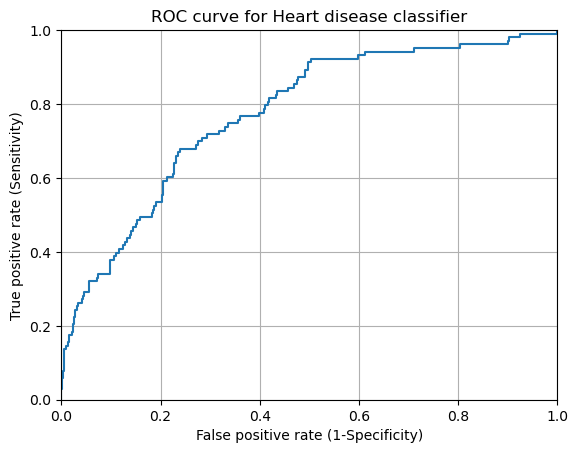

In [29]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

### Area under the curve (AUC)

The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the disparity between true and false positives. The
stronger the model in classifying members of the training dataset. An area of 0.5 corresponds to a model that performs no better than random classification, and a
good classifier stays as far away from that as possible. An area of 1 is ideal—the closer the AUC to 1, the better.

In [30]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.7733827523596586